In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


labelStrings = []
with open("./iris.csv") as f:
    D = []
    L = []
    for line in f.readlines():
        fields = line.split(',')
        features = list(map(float, fields[0:4]))
        if not fields[4] in labelStrings:
            labelStrings.append(fields[4])
        L.append(labelStrings.index(fields[4]))
        D.append(features)

    D = np.array(D).T
    L = np.array(L)
    print(D)
    print(L)

    D0 = D[:, (L == 0)]
    D1 = D[:, (L == 1)]
    D2 = D[:, (L == 2)]

def vcol(x):
    return x.reshape(-1, 1)
def vrow(x):
    return x.reshape(1, -1)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

In [4]:
u = D.mean(axis=1, keepdims=True)
DC = D - u
C = 1/D.shape[1]*DC@DC.T

In [5]:
def compute_PCA(D, L, m=2):
    u = D.mean(axis=1, keepdims=True)
    DC = D - u
    C = 1/D.shape[1]*DC@DC.T
    U, s, Vh = np.linalg.svd(C)
    P = U[:, 0:m]
    return P

[5.006 3.428 1.462 0.246]


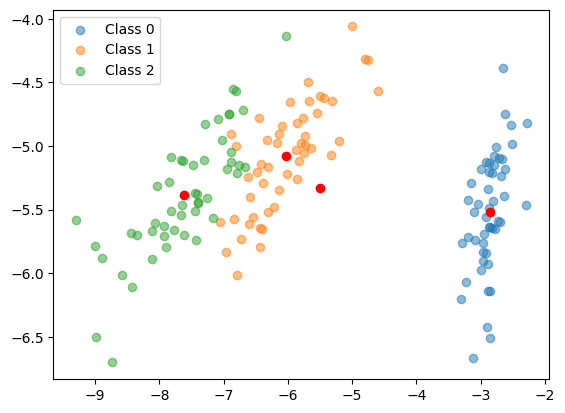

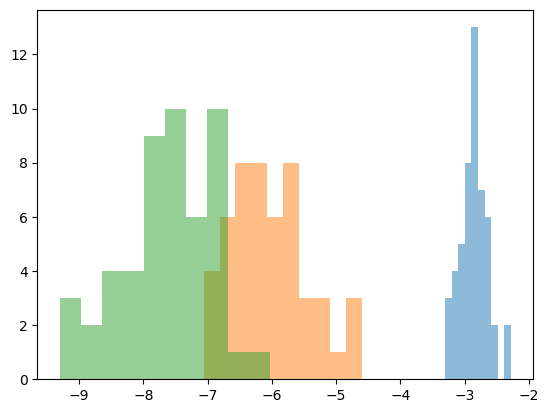

In [ ]:
P = compute_PCA(D, L, 2)
DP = np.dot(P.T, D)

U = D.mean(1, keepdims=True)
UC = []
NC = []

for i in range(0, 3):
    UC.append(D[:, (L == i)].mean(1))
    NC.append(np.count_nonzero(L == i))

UC = np.array(UC).T
print(UC[:, 0])

def plot_projected(DP, L):
    plt.figure()
    for l in np.unique(L):
        DPX = DP[0, (L == l)]
        DPY = DP[1, (L == l)]
        plt.scatter(DPX, DPY, alpha=0.5, label=f'Class {l}')
        plt.legend()


def plot_hist(DP, L, **kwargs):
    plt.figure()
    for l in np.unique(L):
        plt.hist(DP[0, (L == l)], alpha=0.5, label='fClass {l}', **kwargs)

plot_projected(DP, L)

UCP = np.dot(P.T, UC)
UP = np.dot(P.T, U)
plt.scatter(UP[0, 0], UP[1, 0], c='r')

plt.scatter(UCP[0, 0], UCP[1, 0], c='r')
plt.scatter(UCP[0, 1], UCP[1, 1], c='r')
plt.scatter(UCP[0, 2], UCP[1, 2], c='r')

plot_hist(DP, L)

In [7]:
def calc_SB_SW(D, L):
    NL = np.unique(L)
    print(L)
    U = D.mean(1, keepdims=True)
    UC = []
    NC = []

    for l in L:
        UC.append(D[:, (L == l)].mean(1))
        NC.append(np.count_nonzero(L == l))

    UC = np.array(UC).T

    SBsum = 0
    for i, l in enumerate(NL):
        SBsum += NC[i] * (UC[:, [i]] - U) @ (UC[:, [i]] - U).T

    SB = SBsum/D.shape[1]

    D_by_class = [D[:, (L == i)] for i in range(0, NL.size)]
    SWsum = 0

    for i in range(0, len(D_by_class)):
        SWsum += (D_by_class[i] - UC[:, [i]]) @ (D_by_class[i] - UC[:, [i]]).T

    SW = 1/D.shape[1] * SWsum
    
    return (SB, SW)
SB, SW = calc_SB_SW(D, L)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


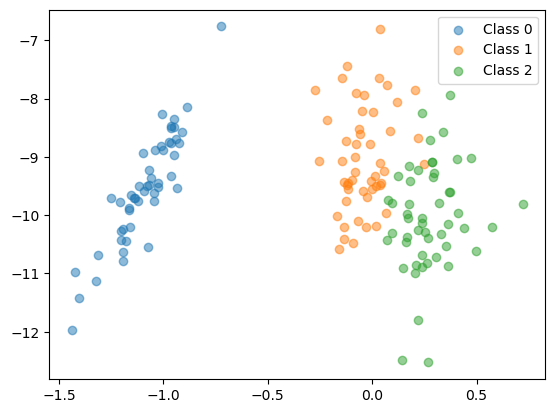

In [8]:
def LDA(SB, SW, m=2):
    s, U = scipy.linalg.eigh(SB, SW)
    W = U[:, ::-1][:, 0:m]
    return W
W = LDA(SB, SW)
DP = np.dot(W.T, D)

plot_projected(DP, L)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


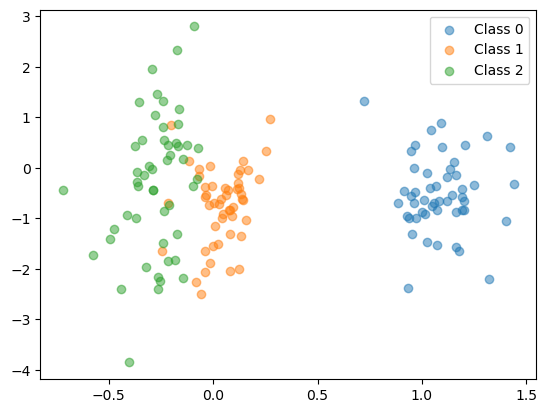

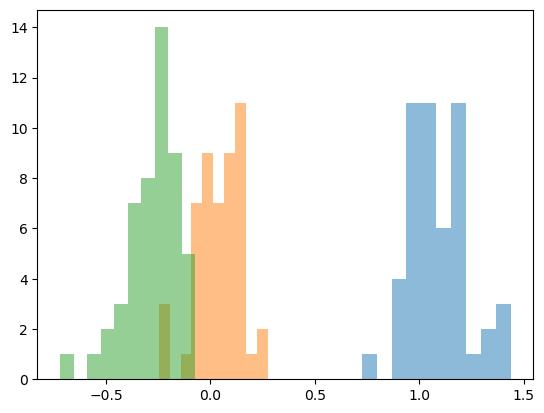

In [9]:
# LDA by joint diagonalization
def LDA_diag(D, L, m = 2):
    SB, SW = calc_SB_SW(D, L)
    U, s, _ = np.linalg.svd(SW)
    P1 = (U * 1.0/s**0.5) @ U.T

    SBT = P1.T @ SB @ P1
    U2, s2, _ = np.linalg.svd(SBT)
    P2 = U2[:, 0:m]
    return np.dot(P2.T, P).T

def apply_lda(U, D):
    return U.T @ D

def compute_lda_JointDiag(D, L, m):

    Sb, Sw = calc_SB_SW(D, L)

    U, s, _ = np.linalg.svd(Sw)
    P = np.dot(U * vrow(1.0/(s**0.5)), U.T)

    Sb2 = np.dot(P, np.dot(Sb, P.T))
    U2, s2, _ = np.linalg.svd(Sb2)

    P2 = U2[:, 0:m]
    return np.dot(P2.T, P).T

ULDA = compute_lda_JointDiag(D, L, 2)
DP = apply_lda(ULDA, D)
plot_projected(DP, L)

plot_hist(DP, L)


[2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2 1 1 2 2 2 2 1 1 1 1 2 1
 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2]
5.4826520816886495
Labels:      [2 2 2 2 2 1 2 2 2 2 1 1 2 1 1 2 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 2 1 1]
Predictions: [2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 1 2 2 1 1 1 2 2 1 1 2 1 1]
Number of erros: 2 (out of 34 samples)
Error rate: 5.9%
2


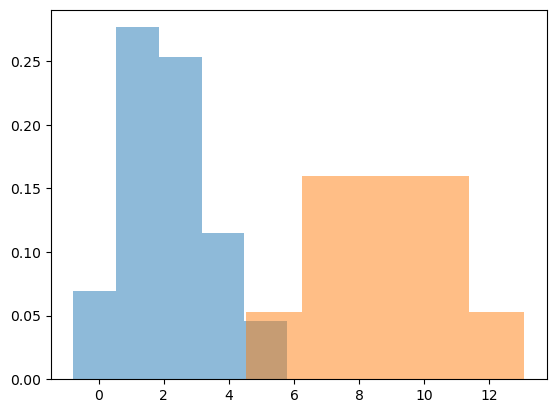

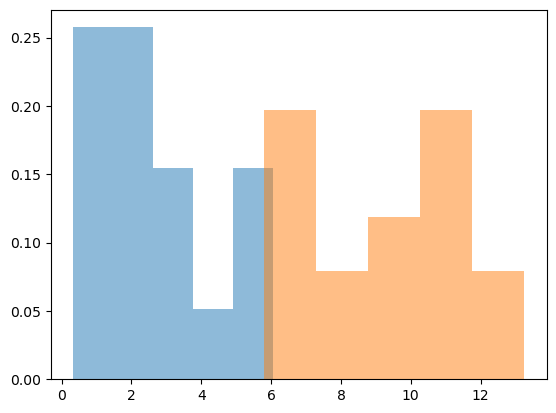

In [10]:
import sklearn.datasets
def load_iris():
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

DIris, LIris = load_iris()
D = DIris[:, LIris != 0]
L = LIris[LIris != 0]

def split_db_2to1(D, L, seed=0):
    nTrain = int(D.shape[1]*2.0/3.0)
    np.random.seed(seed)
    idx = np.random.permutation(D.shape[1])
    idxTrain = idx[0:nTrain]
    idxTest = idx[nTrain:]
    DTR = D[:, idxTrain]
    DVAL = D[:, idxTest]
    LTR = L[idxTrain]
    LVAL = L[idxTest]
    return (DTR, LTR), (DVAL, LVAL)


def classify_lda(D, L):
    (DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L, seed=2)
    ULDA = compute_lda_JointDiag(DTR, LTR, 1)
    DTR_lda = apply_lda(ULDA, DTR)
    DVAL_lda = apply_lda(ULDA, DVAL)

    # Check if the Virginica class samples are, on average, on the right of the Versicolor samples on the training set. If not, we reverse ULDA and re-apply the transformation.
    if DTR_lda[0, LTR==1].mean() > DTR_lda[0, LTR==2].mean():
            ULDA = -ULDA
            DTR_lda = apply_lda(ULDA, DTR)
            DVAL_lda = apply_lda(ULDA, DVAL)


    plot_hist(DTR_lda, LTR, bins=5, density=True)
    plot_hist(DVAL_lda, LVAL, bins=5, density=True)

    # plot_projected(DTR_lda, LTR)

    threshold = (DTR_lda[0, LTR==1].mean() + DTR_lda[0, LTR==2].mean()) / 2.0 #
    print(threshold)

    PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
    PVAL[DVAL_lda[0] >= threshold] = 2
    PVAL[DVAL_lda[0] < threshold] = 1
    print('Labels:     ', LVAL)
    print('Predictions:', PVAL)
    print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
    print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))

    disagreements = np.count_nonzero(PVAL != LVAL)
    print(disagreements)


classify_lda(D, L)

8.256558891665124
Labels:      [1 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]
Predictions: [1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1]
Number of erros: 4 (out of 34 samples)
Error rate: 11.8%


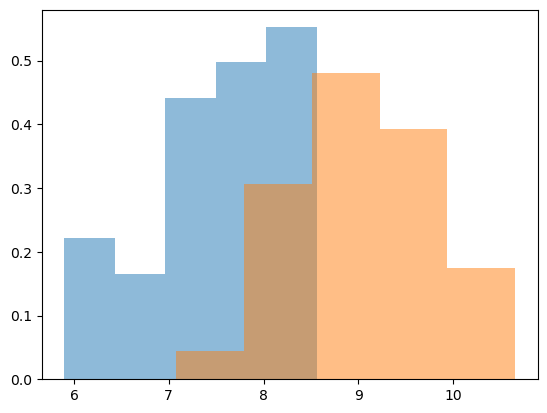

In [26]:
def classify_PCA(D, L):
  (DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L, seed=0)
  P = compute_PCA(DTR, LTR, 1)
  DTR_pca = np.dot(P.T, DTR)


  if DTR_pca[0, LTR==1].mean() > DTR_pca[0, LTR==2].mean():
          P = -P
          DTR_pca = np.dot(P.T, DTR)
          DVAL_pca = np.dot(P.T, DVAL)

  plot_hist(DTR_pca, LTR, bins=5, density=True)

  threshold = (DTR_pca[0, LTR==1].mean() + DTR_pca[0, LTR==2].mean()) / 2.0 #
  print(threshold)
  PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
  PVAL[DVAL_pca[0] >= threshold] = 2
  PVAL[DVAL_pca[0] < threshold] = 1
  print('Labels:     ', LVAL)
  print('Predictions:', PVAL)
  print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
  print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))
classify_PCA(D, L)


[1 1 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1
 2 1 1 1 2 1 2 1 2 1 1 2 1 2 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1]
4.50807753259768
Labels:      [1 1 2 2 1 1 1 2 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 1 2 2 1]
Predictions: [1 1 2 2 1 1 1 2 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 1 2 2 1]
Number of erros: 0 (out of 34 samples)
Error rate: 0.0%


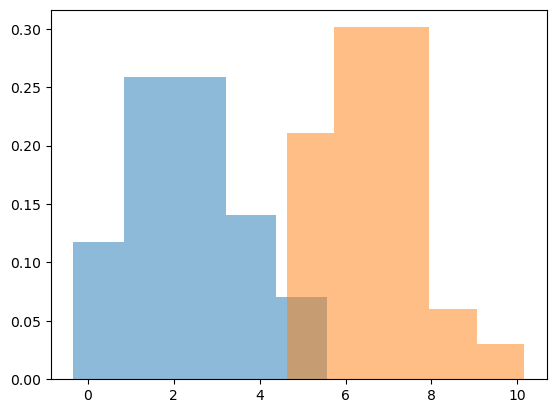

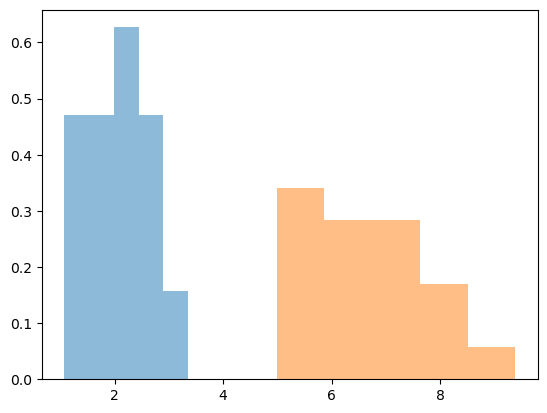

In [22]:
# PCA to 3 dimensions, LDA to 1 dimension
def classify_PCA_LDA(D, L, m1=3):
  (DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L, seed=4)
  P = compute_PCA(DTR, LTR, m1)
  DTR_pca = np.dot(P.T, DTR)
  DVAL_pca = np.dot(P.T, DVAL)


  if DTR_pca[0, LTR==1].mean() > DTR_pca[0, LTR==2].mean():
    P = -P
    DTR_pca = np.dot(P.T, DTR)
    DVAL_pca = np.dot(P.T, DVAL)

  # plot_hist(DTR_pca, LTR, bins=5, density=True)

  ULDA = compute_lda_JointDiag(DTR_pca, LTR, 1)
  DTR_lda = apply_lda(ULDA, DTR_pca)
  DVAL_lda = apply_lda(ULDA, DVAL_pca)

  # Check if the Virginica class samples are, on average, on the right of the Versicolor samples on the training set. If not, we reverse ULDA and re-apply the transformation.
  if DTR_lda[0, LTR==1].mean() > DTR_lda[0, LTR==2].mean():
    ULDA = -ULDA
    DTR_lda = apply_lda(ULDA, DTR_pca)
    DVAL_lda = apply_lda(ULDA, DVAL_pca)


  plot_hist(DTR_lda, LTR, bins=5, density=True)
  plot_hist(DVAL_lda, LVAL, bins=5, density=True)

  # plot_projected(DTR_lda, LTR)

  threshold = (DTR_lda[0, LTR==1].mean() + DTR_lda[0, LTR==2].mean()) / 2.0 #
  print(threshold)

  PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
  PVAL[DVAL_lda[0] >= threshold] = 2
  PVAL[DVAL_lda[0] < threshold] = 1
  print('Labels:     ', LVAL)
  print('Predictions:', PVAL)
  print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
  print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))


classify_PCA_LDA(D, L, 3)

In [ ]:
def analyze():
    D, L = load_iris()
    classify_lda(D, L)
    classify_PCA(D, L)
    classify_PCA_LDA(D, L, 3)